### to investigate whether the funding distribution of countries follows the zip's law or power law distribution

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cntry_fund_frac_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_fund_frac.csv'

In [3]:
cntry_fund=pd.read_csv(cntry_fund_frac_path)
cntry_fund.head()

,fund_cntry,cnt_frac,year,funded,intcol
0,Turkey,1.0,2009,1,0
1,United States,1.0,2009,1,1
2,Russia,1.0,2009,1,0
3,Spain,1.0,2009,1,0
4,Spain,1.0,2009,1,1


In [12]:
fund_all = cntry_fund.groupby(['fund_cntry'])['cnt_frac'].sum().reset_index()
fund_all = fund_all[fund_all.fund_cntry!='Not-Funded']

In [15]:
fund_all['cnt_frac']=fund_all['cnt_frac']/fund_all['cnt_frac'].sum()

In [17]:
fund_all=fund_all.sort_values(by='cnt_frac',ascending=False)
fund_all.head()

,fund_cntry,cnt_frac
35,China,0.230486
182,United States,0.209218
85,Japan,0.044754
63,Germany,0.039668
158,South Korea,0.038919


In [22]:
fund_all['rank'] = fund_all['cnt_frac'].rank(ascending=False)

In [23]:
fund_all.head()

,fund_cntry,cnt_frac,rank
35,China,0.230486,1.0
182,United States,0.209218,2.0
85,Japan,0.044754,3.0
63,Germany,0.039668,4.0
158,South Korea,0.038919,5.0


<AxesSubplot:>

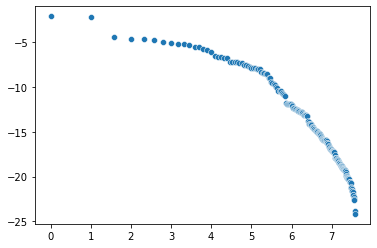

In [29]:
x=np.log2(fund_all['rank'].values)
y=np.log2(fund_all['cnt_frac'].values)
sns.scatterplot(x=x,y=y)